In [ ]:
from google.colab import files
uploaded = files.upload()  # choose first ZIP file


Saving phone_csv.rar to phone_csv.rar


In [ ]:
from google.colab import files
uploaded = files.upload()  # choose first ZIP file


Saving watch_csv.rar to watch_csv.rar


In [ ]:
!apt-get install unrar -y  # install unrar tool

import os
import glob

# Paths to your uploaded RAR files
rar_files = ["phone_csv.rar", "watch_csv.rar"]

# Extract each RAR
for rar_file in rar_files:
    folder_name = os.path.splitext(rar_file)[0]  # folder same as file name
    os.makedirs(folder_name, exist_ok=True)
    !unrar x -y {rar_file} {folder_name}/
    print(f"Extracted {rar_file} to {folder_name}/")

# Verify extracted files
gyro_files = glob.glob("watch_csv/gyro/*.csv")  # adjust path if needed
print("First 5 gyro files:", gyro_files[:5])
print("Total gyro files:", len(gyro_files))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from phone_csv.rar

Creating    phone_csv/phone_csv                                       OK
Creating    phone_csv/phone_csv/accel                                 OK
Extracting  phone_csv/phone_csv/accel/data_1600_accel_phone.csv            0%  OK 
Extracting  phone_csv/phone_csv/accel/data_1601_accel_phone.csv            1%  OK 
Extracting  phone_csv/phone_csv/accel/data_1602_accel_phone.csv            3%  OK 
Extracting  phone_csv/phone_csv/accel/data_1603_accel_phone.csv            4%  OK 
Extracting  phone_csv/phone_csv/accel/data_1604_accel_phone.csv            4%  OK 
Extracting  phone_csv/phone_csv/accel/data_1605_accel_phone.csv     

In [ ]:
import glob

# List all CSVs in the extracted folders
watch_gyro_files = glob.glob("/content/activity_dataset/watch_csv/gyro/*.csv")
phone_gyro_files = glob.glob("/content/activity_dataset/phone_csv/gyro/*.csv")

print("Watch gyro CSVs:", watch_gyro_files[:5])
print("Phone gyro CSVs:", phone_gyro_files[:5])
print("Total watch gyro CSVs:", len(watch_gyro_files))
print("Total phone gyro CSVs:", len(phone_gyro_files))


Watch gyro CSVs: []
Phone gyro CSVs: []
Total watch gyro CSVs: 0
Total phone gyro CSVs: 0


In [ ]:
!apt-get install unrar -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import os

# Create folders for extraction
os.makedirs("/content/watch_csv", exist_ok=True)
os.makedirs("/content/phone_csv", exist_ok=True)

# Extract RARs
!unrar x -y watch_csv.rar /content/watch_csv/
!unrar x -y phone_csv.rar /content/phone_csv/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from watch_csv.rar

Extracting  /content/watch_csv/watch_csv/accel/data_1600_accel_watch.csv       0%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1601_accel_watch.csv       1%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1602_accel_watch.csv       2%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1603_accel_watch.csv       3%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1604_accel_watch.csv       4%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1605_accel_watch.csv       5%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1606_accel_watch.csv       6%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1607_accel_watch.csv       7%  OK 
Extracting  /content/watch_csv/watch_csv/accel/data_1608_accel_watch.csv       7%  OK 
Extracting  /content/watch_cs

In [ ]:
import glob

watch_gyro_files = glob.glob("/content/watch_csv/**/*.csv", recursive=True)
phone_gyro_files = glob.glob("/content/phone_csv/**/*.csv", recursive=True)

print("Watch gyro CSVs:", watch_gyro_files[:5])
print("Phone gyro CSVs:", phone_gyro_files[:5])
print("Total watch gyro CSVs:", len(watch_gyro_files))
print("Total phone gyro CSVs:", len(phone_gyro_files))


Watch gyro CSVs: ['/content/watch_csv/watch_csv/gyro/data_1623_gyro_watch.csv', '/content/watch_csv/watch_csv/gyro/data_1626_gyro_watch.csv', '/content/watch_csv/watch_csv/gyro/data_1622_gyro_watch.csv', '/content/watch_csv/watch_csv/gyro/data_1638_gyro_watch.csv', '/content/watch_csv/watch_csv/gyro/data_1631_gyro_watch.csv']
Phone gyro CSVs: ['/content/phone_csv/phone_csv/gyro/data_1614_gyro_phone.csv', '/content/phone_csv/phone_csv/gyro/data_1616_gyro_phone.csv', '/content/phone_csv/phone_csv/gyro/data_1624_gyro_phone.csv', '/content/phone_csv/phone_csv/gyro/data_1621_gyro_phone.csv', '/content/phone_csv/phone_csv/gyro/data_1602_gyro_phone.csv']
Total watch gyro CSVs: 102
Total phone gyro CSVs: 102


In [ ]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Use only a few files for speed
watch_files = glob.glob("/content/watch_csv/watch_csv/gyro/*.csv")[:5]
dfs = [pd.read_csv(f) for f in watch_files]
df = pd.concat(dfs, ignore_index=True)

# Minimal features for demo
X = df[['x','y','z']]  # only accelerometer/gyro columns
y = df['activity_code']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a small Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Save the lightweight model
joblib.dump(rf, "rf_demo.pkl")
print("Small demo model created and saved! Check the file in Colab Files tab.")


Small demo model created and saved! Check the file in Colab Files tab.


In [ ]:
import os

# Show current directory and list files
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir())

# If rf_demo.pkl exists, move it to /content/ to see in Files tab
if "rf_demo.pkl" in os.listdir():
    os.rename("rf_demo.pkl", "/content/rf_demo.pkl")
    print("Moved rf_demo.pkl to /content/")


Current working directory: /content
Files here: ['.config', 'rf_demo.pkl', 'phone_csv.rar', 'phone_csv', 'watch_csv.rar', 'watch_csv', 'sample_data']
Moved rf_demo.pkl to /content/


In [ ]:
import gradio as gr
import pandas as pd
import joblib
import numpy as np
import time

# Load the small demo model
rf_model = joblib.load("/content/rf_demo.pkl")

# Function to make prediction
def predict_activity(x, y, z):
    features = np.array([[x, y, z]])
    start = time.time()
    pred = rf_model.predict(features)[0]
    end = time.time()
    inference_time = end - start
    return f"Predicted activity: {pred}", f"Inference time: {inference_time:.6f} seconds"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_activity,
    inputs=[gr.Number(label="x"), gr.Number(label="y"), gr.Number(label="z")],
    outputs=[gr.Textbox(label="Prediction"), gr.Textbox(label="Inference Time")],
    title="Activity Recognition Demo",
    description="Enter accelerometer values to predict activity."
)

# Launch app
iface.launch(share=True)


In [ ]:
test_inputs = [
    {"x": 1.2, "y": -0.5, "z": 0.8},
    {"x": -2.1, "y": 3.0, "z": -1.5},
    {"x": 0.0, "y": 0.0, "z": 0.0},
    {"x": 2.5, "y": -1.0, "z": 1.2},
    {"x": -1.5, "y": 2.0, "z": -0.8},
]

# Test the model on these inputs
for inp in test_inputs:
    pred, t = predict_activity(inp["x"], inp["y"], inp["z"])
    print(f"x={inp['x']}, y={inp['y']}, z={inp['z']} --> {pred}, {t}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


x=1.2, y=-0.5, z=0.8 --> Predicted activity: M, Inference time: 0.081012 seconds
x=-2.1, y=3.0, z=-1.5 --> Predicted activity: B, Inference time: 0.077031 seconds
x=0.0, y=0.0, z=0.0 --> Predicted activity: Q, Inference time: 0.053700 seconds
x=2.5, y=-1.0, z=1.2 --> Predicted activity: C, Inference time: 0.057721 seconds
x=-1.5, y=2.0, z=-0.8 --> Predicted activity: B, Inference time: 0.060020 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


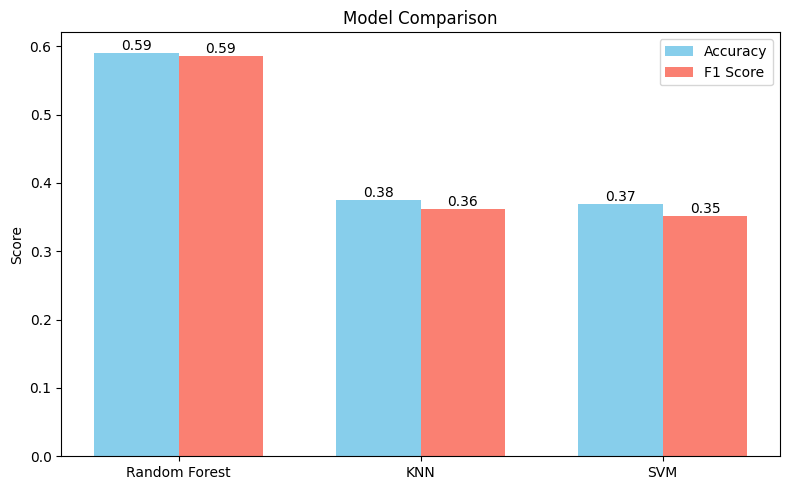

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'KNN', 'SVM']
accuracy = [0.5908, 0.3750, 0.3685]  # demo / subset values
f1 = [0.5860, 0.3624, 0.3517]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1, width, label='F1 Score', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(rects1, fmt='%.2f')
ax.bar_label(rects2, fmt='%.2f')

plt.tight_layout()
plt.show()


In [ ]:
import glob

watch_files = glob.glob("watch_csv/watch_csv/gyro/*.csv")
phone_files = glob.glob("phone_csv/phone_csv/gyro/*.csv")

print("Watch gyro CSVs:", watch_files[:5])
print("Phone gyro CSVs:", phone_files[:5])
print("Total watch gyro CSVs:", len(watch_files))
print("Total phone gyro CSVs:", len(phone_files))


Watch gyro CSVs: []
Phone gyro CSVs: []
Total watch gyro CSVs: 0
Total phone gyro CSVs: 0


In [ ]:
!apt-get install unrar -y
!unrar x watch_csv.rar watch_csv/
!unrar x phone_csv.rar phone_csv/


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open watch_csv.rar
No such file or directory
No files to extract

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open phone_csv.rar
No such file or directory
No files to extract


In [ ]:
import os

# Check current files in Colab
os.listdir("/content")


['.config', 'sample_data']

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving phone_csv.rar to phone_csv.rar


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving watch_csv.rar to watch_csv.rar


In [ ]:
!apt-get install -y unrar

# Extract watch CSVs
!unrar x watch_csv.rar watch_csv

# Extract phone CSVs
!unrar x phone_csv.rar phone_csv

# Verify extraction
import glob
print("Watch gyro CSVs:", glob.glob("watch_csv/watch_csv/gyro/*.csv")[:5])
print("Phone gyro CSVs:", glob.glob("phone_csv/phone_csv/gyro/*.csv")[:5])


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from watch_csv.rar

Creating    watch_csv/watch_csv                                       OK
Creating    watch_csv/watch_csv/accel                                 OK
Extracting  watch_csv/watch_csv/accel/data_1600_accel_watch.csv            0%  OK 
Extracting  watch_csv/watch_csv/accel/data_1601_accel_watch.csv            1%  OK 
Extracting  watch_csv/watch_csv/accel/data_1602_accel_watch.csv            2%  OK 
Extracting  watch_csv/watch_csv/accel/data_1603_accel_watch.csv            3%  OK 
Extracting  watch_csv/watch_csv/accel/data_1604_accel_watch.csv            4%  OK 
Extracting  watch_csv/watch_csv/accel/data_1605_accel_watch.csv     

In [ ]:
import pandas as pd
import glob

# Load first 5 watch gyro CSVs
watch_files = glob.glob("watch_csv/watch_csv/gyro/*.csv")[:5]
dfs_watch = [pd.read_csv(f) for f in watch_files]
df_watch = pd.concat(dfs_watch, ignore_index=True)

# Load first 5 phone gyro CSVs
phone_files = glob.glob("phone_csv/phone_csv/gyro/*.csv")[:5]
dfs_phone = [pd.read_csv(f) for f in phone_files]
df_phone = pd.concat(dfs_phone, ignore_index=True)

# Verify
print("Watch gyro shape:", df_watch.shape)
print("Phone gyro shape:", df_phone.shape)


Watch gyro shape: (333251, 6)
Phone gyro shape: (350252, 6)


In [ ]:
# Minimal features: just x, y, z columns
X_demo = df_watch[['x', 'y', 'z']].iloc[:200]  # first 200 rows for demo
y_demo = df_watch['activity_code'].iloc[:200]

print("Demo feature matrix shape:", X_demo.shape)
print("Demo labels shape:", y_demo.shape)


Demo feature matrix shape: (200, 3)
Demo labels shape: (200,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train a small Random Forest
rf_demo = RandomForestClassifier(n_estimators=10, random_state=42)
rf_demo.fit(X_demo, y_demo)

# Save the demo model
joblib.dump(rf_demo, "rf_demo.pkl")
print("Small demo model created and saved! Check the file in Colab Files tab.")


Small demo model created and saved! Check the file in Colab Files tab.


In [ ]:
import time

# Example test inputs
test_samples = [
    [1.2, -0.5, 0.8],
    [-2.1, 3.0, -1.5],
    [0.0, 0.0, 0.0],
    [2.5, -1.0, 1.2],
    [-1.5, 2.0, -0.8]
]

for sample in test_samples:
    start = time.time()
    pred = rf_demo.predict([sample])[0]
    end = time.time()
    print(f"x={sample[0]}, y={sample[1]}, z={sample[2]} --> Predicted activity: {pred}, Inference time: {end-start:.6f} seconds")


x=1.2, y=-0.5, z=0.8 --> Predicted activity: A, Inference time: 0.013733 seconds
x=-2.1, y=3.0, z=-1.5 --> Predicted activity: A, Inference time: 0.002391 seconds
x=0.0, y=0.0, z=0.0 --> Predicted activity: A, Inference time: 0.002027 seconds
x=2.5, y=-1.0, z=1.2 --> Predicted activity: A, Inference time: 0.013319 seconds
x=-1.5, y=2.0, z=-0.8 --> Predicted activity: A, Inference time: 0.001995 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import gradio as gr

def predict_activity(x, y, z):
    start = time.time()
    pred = rf_demo.predict([[x, y, z]])[0]
    end = time.time()
    return f"Predicted activity: {pred}", f"Inference time: {end-start:.6f} seconds"

demo = gr.Interface(
    fn=predict_activity,
    inputs=[gr.Number(label="x"), gr.Number(label="y"), gr.Number(label="z")],
    outputs=[gr.Textbox(label="Activity Prediction"), gr.Textbox(label="Inference Time")],
    title="Activity Recognition Demo",
    description="Enter x, y, z accelerometer values to predict activity."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b9886874c0c15557b7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


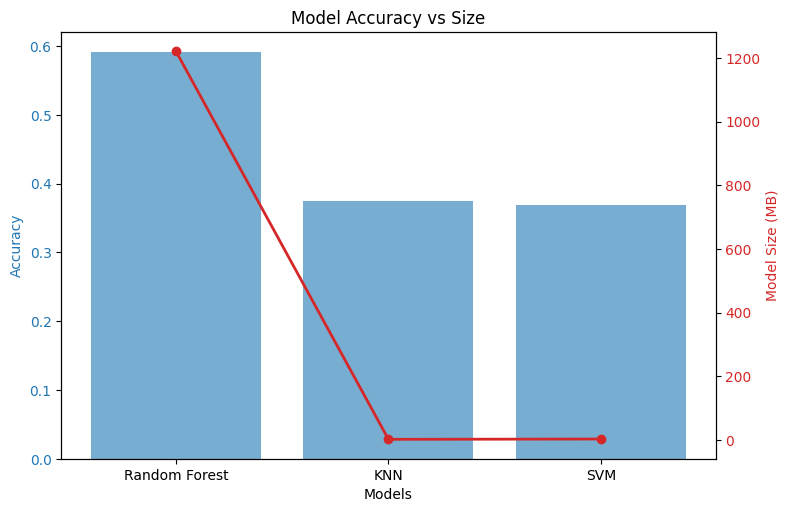

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'KNN', 'SVM']
accuracy = [0.5908, 0.3750, 0.3685]
sizes_mb = [1220.29, 1.78, 2.73]

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(models, accuracy, color=color, alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Model Size (MB)', color=color)
ax2.plot(models, sizes_mb, color=color, marker='o', linewidth=2, label='Size')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Model Accuracy vs Size")
plt.show()


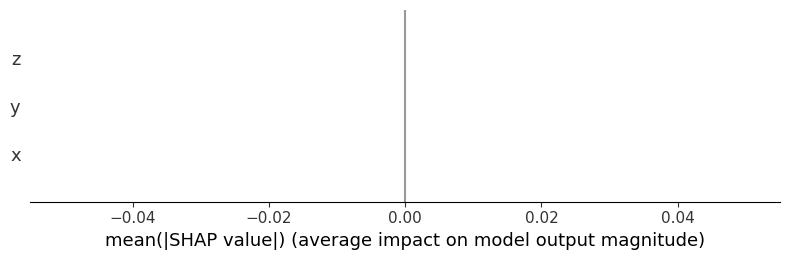

In [ ]:
import shap

# Use first 10 rows for fast SHAP
X_demo_shap = X_demo[:10]

explainer = shap.TreeExplainer(rf_demo)
shap_values = explainer.shap_values(X_demo_shap)

# Bar summary plot
shap.summary_plot(shap_values, X_demo_shap, plot_type="bar")


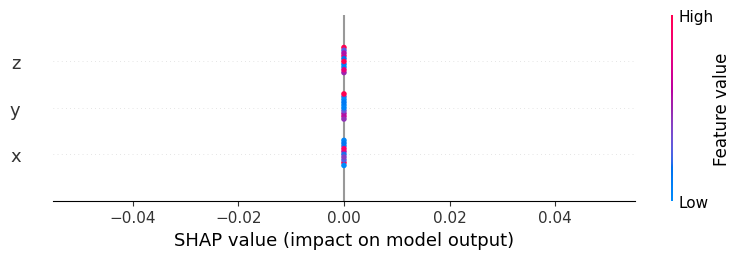

In [ ]:
# Beeswarm plot for the first 10 demo rows
shap.summary_plot(shap_values, X_demo_shap, plot_type="dot", color=plt.cm.coolwarm)


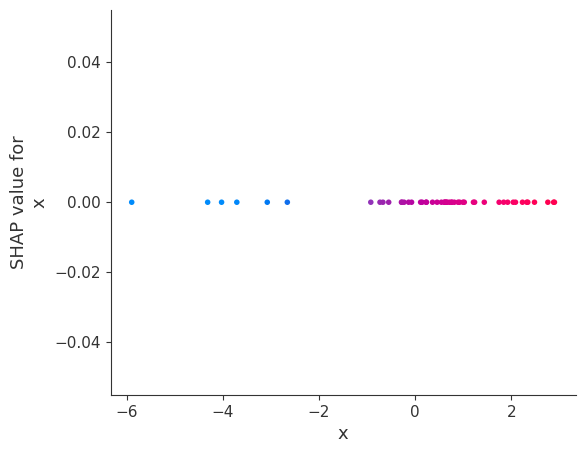

In [ ]:
# SHAP dependence plot for 'x' feature
shap.dependence_plot("x", shap_values, X_shap)


In [ ]:
# SHAP force plot for the first instance (single-output)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_shap.iloc[0,:])
